### Carga de Librerías

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import modulosP2 as mod
import preprocessor as pp
from sklearn.preprocessing import StandardScaler

### Carga de Dataset

In [2]:
data = pd.read_csv('DataProyecto.csv', sep = ",", encoding='latin-1')
dataset = data

In [4]:
dataset = dataset.drop(['Precio', 'Cantidad', 'Almacen_Recurrente', 'Fecha_Emision', 'Vehiculo','Tipo_Periodo' , 'Descuento_Lineal' , 'Moneda', 'Tipo_Cambio' , 'Sub_Contrato','Almacen_CT' , 'Transaccion_Ventas' , 'Pais' ,'Frecuencia',  'Importe' , 'Usuario', 'Agente','Impuestos' ,'Familia','Movimiento_Ventas'], axis=1)

In [5]:
dataset

,Tipo_Contrato,Cliente,Nombre,Proyecto,Grupo,Articulo,Descripcion_Plan,Equipo,Serie,Precio_Total,Placas,Modelo,Chasis,Motor,Lineas,Fabricante,Tracker_Clase,Trackertipo,Color
0,1,GTC-085342,"CORAVI, SOCIEDAD ANONIMA",Particular,Particulares,ALQ1A0015,Plan Alquiler Anual Radiofrecuencia EL CAZADOR...,PLUS,102521,350.00,C269BVX,1997,2FUPDSEB4VA5752752,06R02936706067GK60,FLD120 D132064T,FreightLiner,CABEZAL,CABEZAL,Rojo Policromado
1,1,GTC-086916,MF TRANSPORTES,Particular,Particulares,ALQUI0013,Plan Alquiler Mensual GPS Serie V1000,GPS,375768,220.00,C691BPD,2000,YC060717,06R05303366067MK60,9400 EAGLE 6 X 4,International,CABEZAL,CABEZAL,BLANCO CON FRANJAS AZUL Y NEGRAS
2,1,GTC-000014,"SEGUROS G&T, S.A.",Particular,Aseguradoras,ALQUI0013,Plan Alquiler Mensual GPS Serie V1000,GPS,456557,40.00,P439DKS,2008,JTDBT933081225552,1NZ4840599,Yaris,Toyota,AUTOMOVIL,AUTOMOVIL,OLIVO METALICO
3,1,GTC-000014,"SEGUROS G&T, S.A.",Particular,Particulares,ALQUI0013,Plan Alquiler Mensual GPS Serie V1000,GPS,403831,40.00,C527BKT,2008,JHFAF03H689000862,W04DJ25487,WU300L-HBMMS3,Hino,CAMION,CAMION,Gris Claro
4,1,GTC-006218,"CARRO FACIL, S.A.",Comodato,Financieras,ALQ1A0015,Plan Alquiler Anual Radiofrecuencia EL CAZADOR...,PLUS,200896,256.48,S317178,2022,8AJDB3CD8N1317178,2GD1055567,Hilux,Toyota,PICK UP,PICK UP,Super Blanco II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,0,HNC-000001,CORPORACION FLORES S.A.,Particular,Concesionarios,VTA1A0032,Plan Anual Serie RF3000,RF,497650,311.00,S731690,2022,MROKB3CC600731690,2GD1128101,Hilux,TOYOTA,AUTOMOVIL,Pick Up,ROJO EMOCIONAL
2330,0,HNC-000001,CORPORACION FLORES S.A.,Particular,Concesionarios,VTA1A0032,Plan Anual Serie RF3000,RF,193224,311.00,S511911,2022,8AJDB8CB70551911,S511911,Hilux,TOYOTA,AUTOMOVIL,Pick Up,Rojo
2331,0,HNC-000001,CORPORACION FLORES S.A.,Particular,Concesionarios,VTA1A0032,Plan Anual Serie RF3000,RF,176339,311.00,S731682,2022,MR0KB3CC700731682,2GD1125402,Hilux,TOYOTA,PICK UP,Pick Up,ROJO EMOCIONAL
2332,0,HNC-000001,CORPORACION FLORES S.A.,Particular,Concesionarios,VTA1A0032,Plan Anual Serie RF3000,RF,186458,311.00,S243820,2022,JTEBR3FJ10K243820,1GD8873156,Prado,TOYOTA,AUTOMOVIL,Camioneta,Azul Verdoso


### Variables Numéricas

In [6]:
mod.getNumColNames(dataset)

['Serie', 'Precio_Total', 'Modelo']

#### Variables Categóricas

In [7]:
mod.getCatColNames(dataset)

['Tipo_Contrato',
 'Cliente',
 'Nombre',
 'Proyecto',
 'Grupo',
 'Articulo',
 'Descripcion_Plan',
 'Equipo',
 'Placas',
 'Chasis',
 'Motor',
 'Lineas',
 'Fabricante',
 'Tracker_Clase',
 'Trackertipo',
 'Color']

### Variables Numéricas con Faltantes

In [8]:
cols_num_con_nan = mod.getNumNanColNames(dataset)
cols_num_con_nan

[]

#### El dataset contiene pocas variables numéricas y ninguna de ellas tiene NaN

### Imputación de Columnas Numéricas que contienen Nan

In [9]:
for col in cols_num_con_nan:
    pp.imputVN(dataset, col ,"Tipo_Contrato")

### Columnas Categóricas con Nan menor a 5%

In [10]:
cols_cca = mod.getNanGoodColsNames(dataset, 0.05)
cols_cca

['Tipo_Contrato',
 'Cliente',
 'Nombre',
 'Proyecto',
 'Grupo',
 'Articulo',
 'Descripcion_Plan',
 'Equipo',
 'Serie',
 'Precio_Total',
 'Placas',
 'Modelo',
 'Chasis',
 'Motor',
 'Lineas',
 'Fabricante',
 'Tracker_Clase',
 'Trackertipo',
 'Color']

### Aplicación de CCA para columnas Categoricas con Nan 

In [11]:
dataset_temp = dataset[cols_cca].dropna()

In [12]:
dataset_temp.shape, dataset.shape

((2331, 19), (2334, 19))

In [13]:
dataset_vn = dataset_temp

### Determinación de columnas categoricas con NaN mayor a 5%

In [14]:
cols_cat_con_nan = mod.getCatNanColNames(dataset_vn)
cols_cat_con_nan

[]

#### No hay variables categoricas con nan

### Función Imputación de Variables Categóricas con Missings

In [15]:
for col in cols_cat_con_nan:
    pp.ImpVC(dataset_vn)

In [16]:
dataset_vc = dataset_vn
dataset_vc

,Tipo_Contrato,Cliente,Nombre,Proyecto,Grupo,Articulo,Descripcion_Plan,Equipo,Serie,Precio_Total,Placas,Modelo,Chasis,Motor,Lineas,Fabricante,Tracker_Clase,Trackertipo,Color
0,1,GTC-085342,"CORAVI, SOCIEDAD ANONIMA",Particular,Particulares,ALQ1A0015,Plan Alquiler Anual Radiofrecuencia EL CAZADOR...,PLUS,102521,350.00,C269BVX,1997,2FUPDSEB4VA5752752,06R02936706067GK60,FLD120 D132064T,FreightLiner,CABEZAL,CABEZAL,Rojo Policromado
1,1,GTC-086916,MF TRANSPORTES,Particular,Particulares,ALQUI0013,Plan Alquiler Mensual GPS Serie V1000,GPS,375768,220.00,C691BPD,2000,YC060717,06R05303366067MK60,9400 EAGLE 6 X 4,International,CABEZAL,CABEZAL,BLANCO CON FRANJAS AZUL Y NEGRAS
2,1,GTC-000014,"SEGUROS G&T, S.A.",Particular,Aseguradoras,ALQUI0013,Plan Alquiler Mensual GPS Serie V1000,GPS,456557,40.00,P439DKS,2008,JTDBT933081225552,1NZ4840599,Yaris,Toyota,AUTOMOVIL,AUTOMOVIL,OLIVO METALICO
3,1,GTC-000014,"SEGUROS G&T, S.A.",Particular,Particulares,ALQUI0013,Plan Alquiler Mensual GPS Serie V1000,GPS,403831,40.00,C527BKT,2008,JHFAF03H689000862,W04DJ25487,WU300L-HBMMS3,Hino,CAMION,CAMION,Gris Claro
4,1,GTC-006218,"CARRO FACIL, S.A.",Comodato,Financieras,ALQ1A0015,Plan Alquiler Anual Radiofrecuencia EL CAZADOR...,PLUS,200896,256.48,S317178,2022,8AJDB3CD8N1317178,2GD1055567,Hilux,Toyota,PICK UP,PICK UP,Super Blanco II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,0,HNC-000001,CORPORACION FLORES S.A.,Particular,Concesionarios,VTA1A0032,Plan Anual Serie RF3000,RF,497650,311.00,S731690,2022,MROKB3CC600731690,2GD1128101,Hilux,TOYOTA,AUTOMOVIL,Pick Up,ROJO EMOCIONAL
2330,0,HNC-000001,CORPORACION FLORES S.A.,Particular,Concesionarios,VTA1A0032,Plan Anual Serie RF3000,RF,193224,311.00,S511911,2022,8AJDB8CB70551911,S511911,Hilux,TOYOTA,AUTOMOVIL,Pick Up,Rojo
2331,0,HNC-000001,CORPORACION FLORES S.A.,Particular,Concesionarios,VTA1A0032,Plan Anual Serie RF3000,RF,176339,311.00,S731682,2022,MR0KB3CC700731682,2GD1125402,Hilux,TOYOTA,PICK UP,Pick Up,ROJO EMOCIONAL
2332,0,HNC-000001,CORPORACION FLORES S.A.,Particular,Concesionarios,VTA1A0032,Plan Anual Serie RF3000,RF,186458,311.00,S243820,2022,JTEBR3FJ10K243820,1GD8873156,Prado,TOYOTA,AUTOMOVIL,Camioneta,Azul Verdoso


### Codificación Variables Categóricas

In [17]:
cat_cols = mod.getCategoryVars(dataset_vc)
cat_cols

['Tipo_Contrato',
 'Cliente',
 'Nombre',
 'Proyecto',
 'Grupo',
 'Articulo',
 'Descripcion_Plan',
 'Equipo',
 'Placas',
 'Chasis',
 'Motor',
 'Lineas',
 'Fabricante',
 'Tracker_Clase',
 'Trackertipo',
 'Color']

#### Imputación por Frequency Encoding

In [18]:
for col in cat_cols:
    pp.executeFreqEncoding(dataset_vc, map_type='freq')

In [19]:
dataset_cvc = dataset_vc
dataset_cvc

,Tipo_Contrato,Cliente,Nombre,Proyecto,Grupo,Articulo,Descripcion_Plan,Equipo,Serie,Precio_Total,Placas,Modelo,Chasis,Motor,Lineas,Fabricante,Tracker_Clase,Trackertipo,Color
0,1025.0,2.0,2.0,1956.0,923.0,249.0,249.0,868.0,102521,350.00,2.0,1997,2.0,2.0,2.0,68.0,118.0,120.0,4.0
1,1025.0,2.0,2.0,1956.0,923.0,232.0,232.0,865.0,375768,220.00,2.0,2000,2.0,2.0,2.0,57.0,118.0,120.0,2.0
2,1025.0,78.0,78.0,1956.0,53.0,232.0,232.0,865.0,456557,40.00,1.0,2008,1.0,1.0,28.0,600.0,377.0,162.0,11.0
3,1025.0,78.0,78.0,1956.0,923.0,232.0,232.0,865.0,403831,40.00,1.0,2008,1.0,1.0,1.0,61.0,327.0,305.0,3.0
4,1025.0,14.0,14.0,372.0,616.0,249.0,249.0,868.0,200896,256.48,1.0,2022,1.0,1.0,392.0,600.0,361.0,186.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,1306.0,291.0,291.0,1956.0,341.0,325.0,325.0,398.0,497650,311.00,2.0,2022,2.0,2.0,392.0,135.0,377.0,336.0,44.0
2330,1306.0,291.0,291.0,1956.0,341.0,325.0,325.0,398.0,193224,311.00,1.0,2022,1.0,1.0,392.0,135.0,377.0,336.0,141.0
2331,1306.0,291.0,291.0,1956.0,341.0,325.0,325.0,398.0,176339,311.00,3.0,2022,3.0,3.0,392.0,135.0,361.0,336.0,44.0
2332,1306.0,291.0,291.0,1956.0,341.0,325.0,325.0,398.0,186458,311.00,2.0,2022,2.0,2.0,55.0,135.0,377.0,77.0,5.0


In [20]:
dataset_cvc.dtypes

Tipo_Contrato       float64
Cliente             float64
Nombre              float64
Proyecto            float64
Grupo               float64
Articulo            float64
Descripcion_Plan    float64
Equipo              float64
Serie                 int64
Precio_Total        float64
Placas              float64
Modelo                int64
Chasis              float64
Motor               float64
Lineas              float64
Fabricante          float64
Tracker_Clase       float64
Trackertipo         float64
Color               float64
dtype: object

### Transformación de Variables Numéricas

In [21]:
numeric_cont_vars = mod.getContinuesCols(dataset_cvc)
numeric_cont_vars

['Cliente',
 'Nombre',
 'Articulo',
 'Descripcion_Plan',
 'Serie',
 'Precio_Total',
 'Modelo',
 'Lineas',
 'Fabricante',
 'Tracker_Clase',
 'Trackertipo',
 'Color']

### Graficación de las variables para transformación

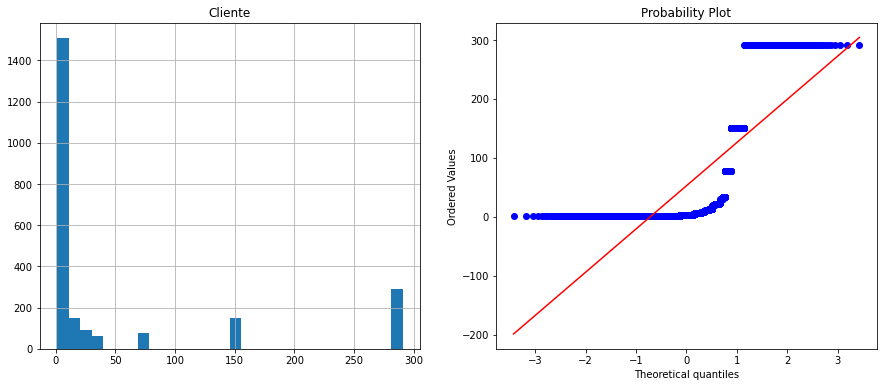

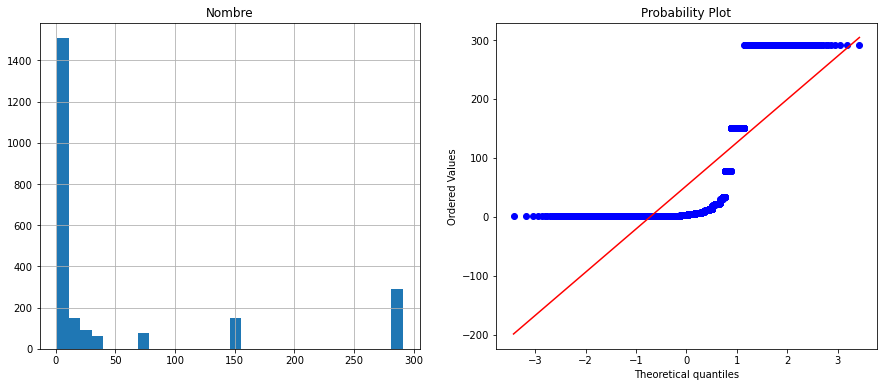

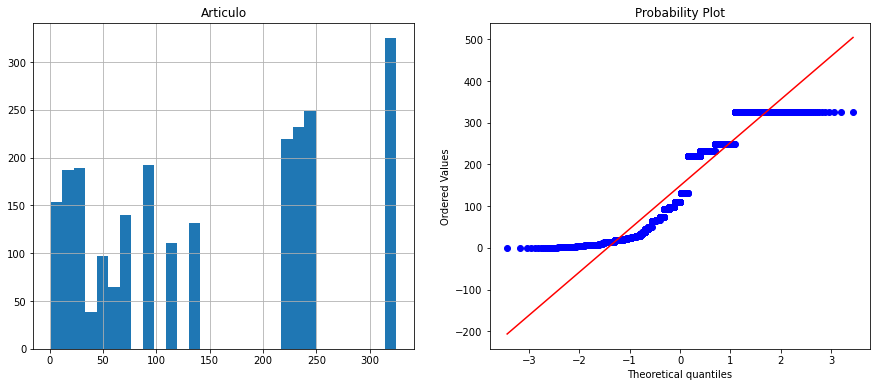

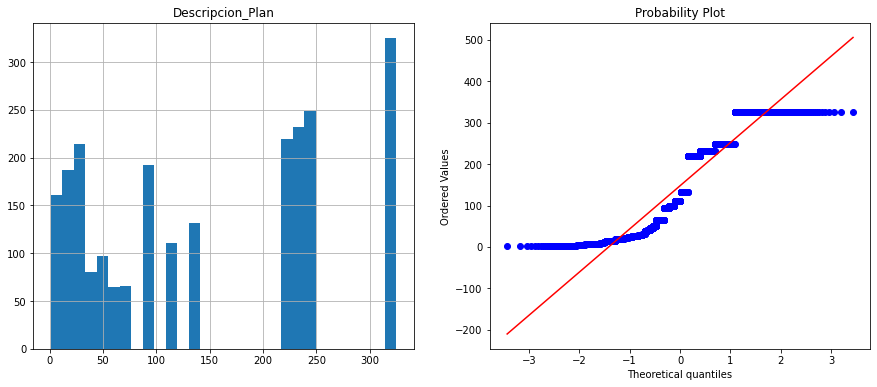

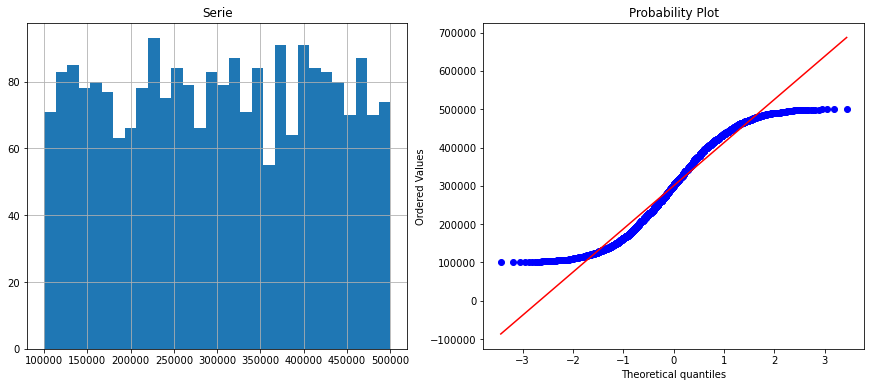

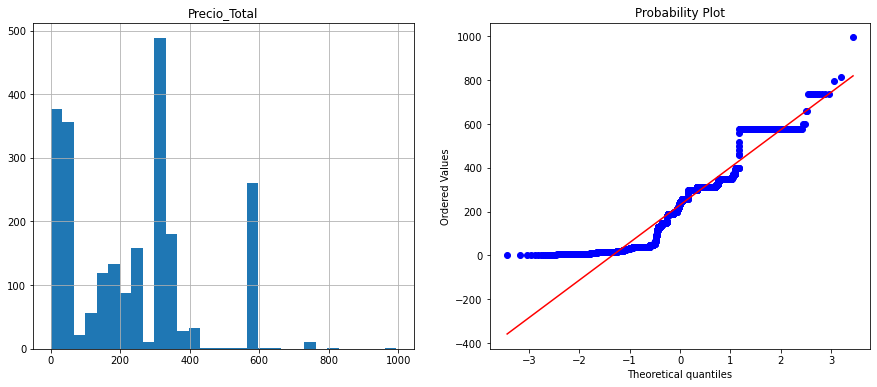

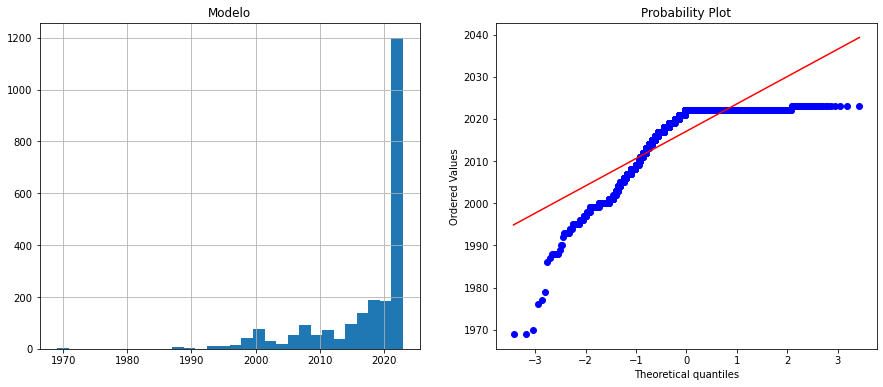

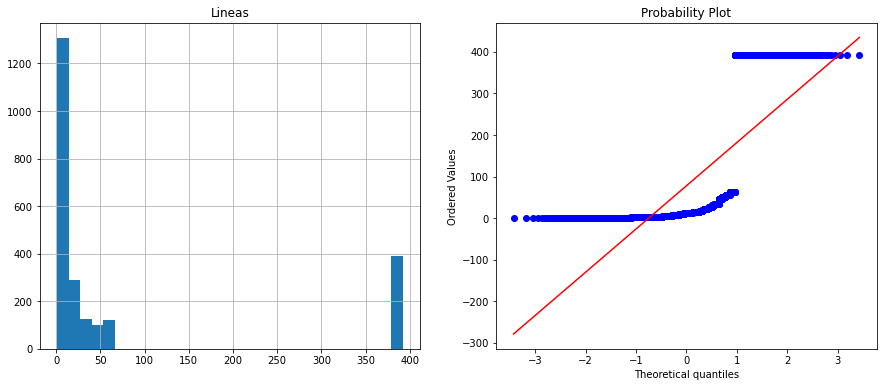

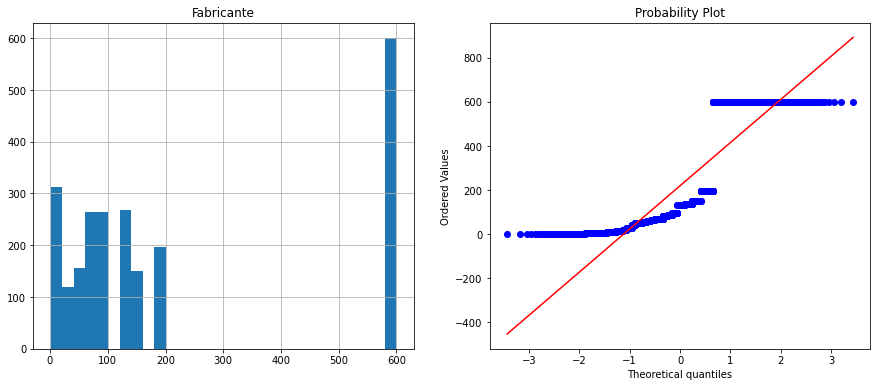

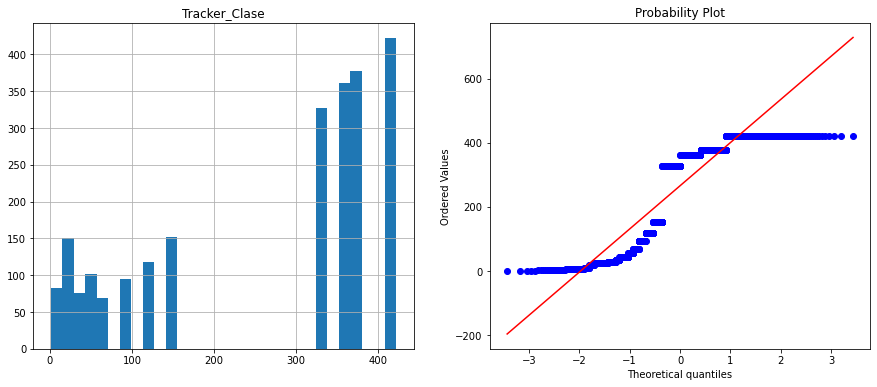

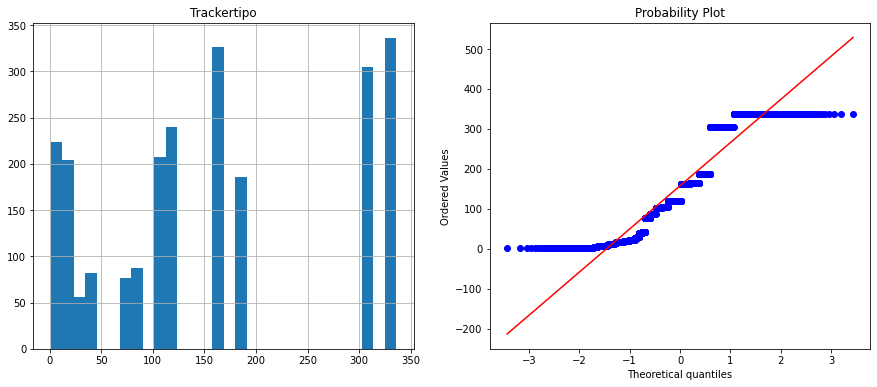

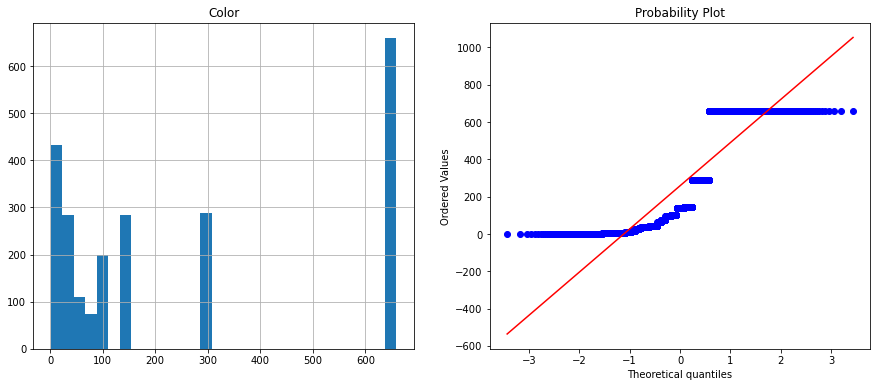

In [22]:
for col in numeric_cont_vars:
    mod.plot_density_variable(dataset_cvc, col)

### Función de Transformación de Variables

In [23]:
for col in numeric_cont_vars:
        pp.transfvnum(dataset_cvc, col,"Tipo_Contrato")

In [24]:
dataset_tvn = dataset_cvc

In [25]:
dataset_tvn

,Tipo_Contrato,Cliente,Nombre,Proyecto,Grupo,Articulo,Descripcion_Plan,Equipo,Serie,Precio_Total,Placas,Modelo,Chasis,Motor,Lineas,Fabricante,Tracker_Clase,Trackertipo,Color
0,1025.0,2.0,2.0,1956.0,923.0,249.0,249.0,868.0,102521,350.00,2.0,1997,2.0,2.0,2.0,68.0,118.0,120.0,4.0
1,1025.0,2.0,2.0,1956.0,923.0,232.0,232.0,865.0,375768,220.00,2.0,2000,2.0,2.0,2.0,57.0,118.0,120.0,2.0
2,1025.0,78.0,78.0,1956.0,53.0,232.0,232.0,865.0,456557,40.00,1.0,2008,1.0,1.0,28.0,600.0,377.0,162.0,11.0
3,1025.0,78.0,78.0,1956.0,923.0,232.0,232.0,865.0,403831,40.00,1.0,2008,1.0,1.0,1.0,61.0,327.0,305.0,3.0
4,1025.0,14.0,14.0,372.0,616.0,249.0,249.0,868.0,200896,256.48,1.0,2022,1.0,1.0,392.0,600.0,361.0,186.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,1306.0,291.0,291.0,1956.0,341.0,325.0,325.0,398.0,497650,311.00,2.0,2022,2.0,2.0,392.0,135.0,377.0,336.0,44.0
2330,1306.0,291.0,291.0,1956.0,341.0,325.0,325.0,398.0,193224,311.00,1.0,2022,1.0,1.0,392.0,135.0,377.0,336.0,141.0
2331,1306.0,291.0,291.0,1956.0,341.0,325.0,325.0,398.0,176339,311.00,3.0,2022,3.0,3.0,392.0,135.0,361.0,336.0,44.0
2332,1306.0,291.0,291.0,1956.0,341.0,325.0,325.0,398.0,186458,311.00,2.0,2022,2.0,2.0,55.0,135.0,377.0,77.0,5.0


### Outliers

In [26]:
numeric_cont_vars

['Cliente',
 'Nombre',
 'Articulo',
 'Descripcion_Plan',
 'Serie',
 'Precio_Total',
 'Modelo',
 'Lineas',
 'Fabricante',
 'Tracker_Clase',
 'Trackertipo',
 'Color']

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


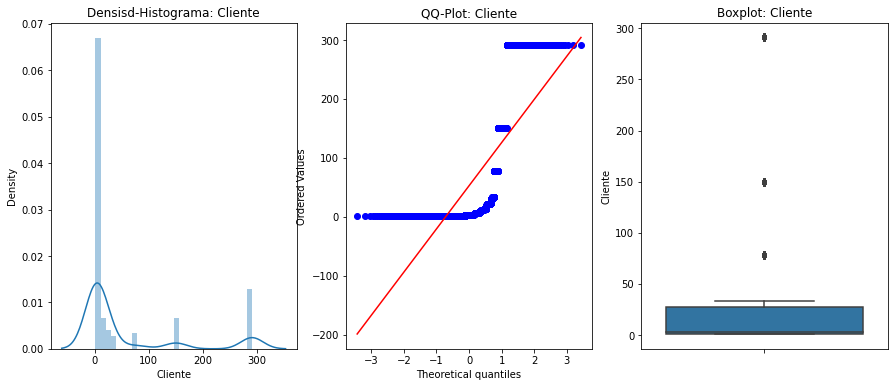

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


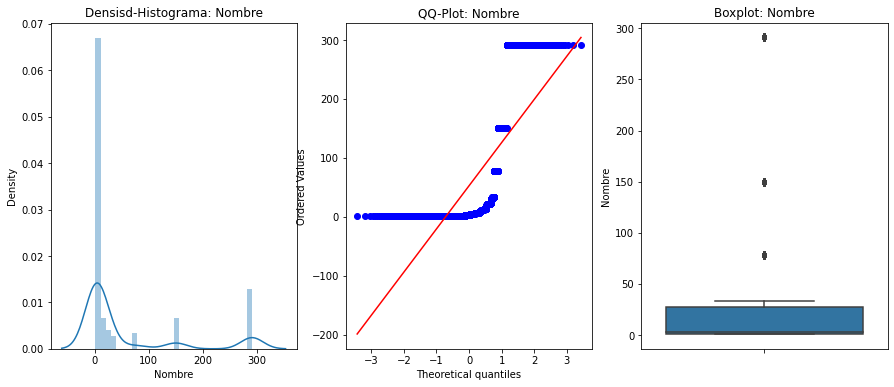

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


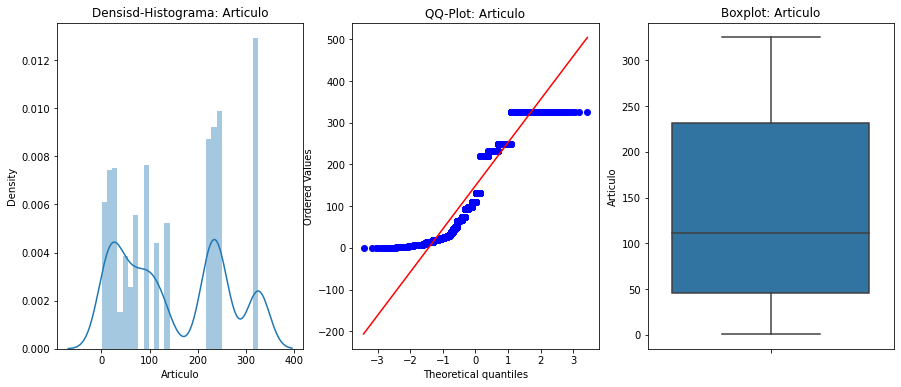

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


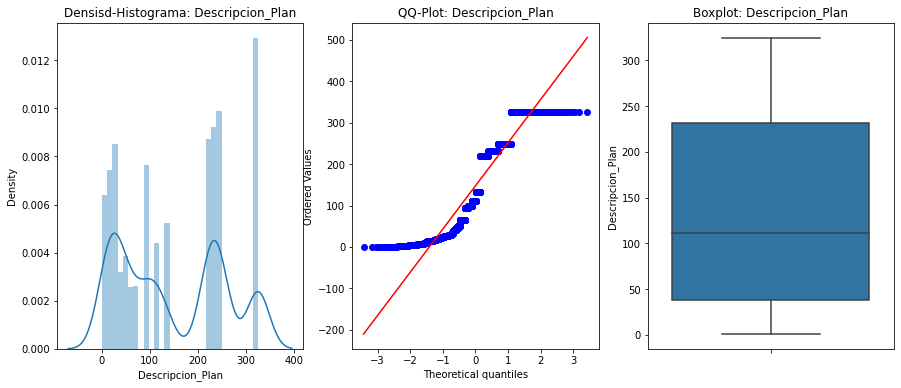

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


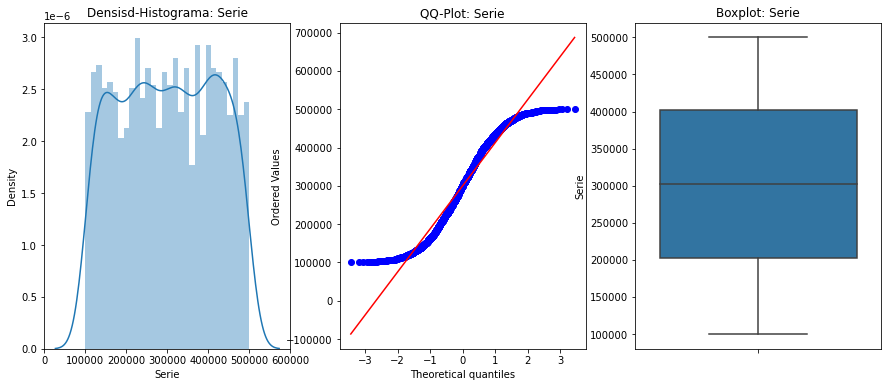

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


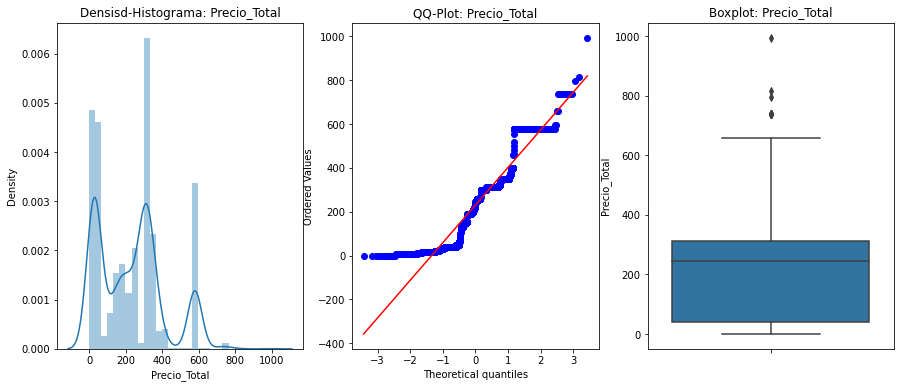

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


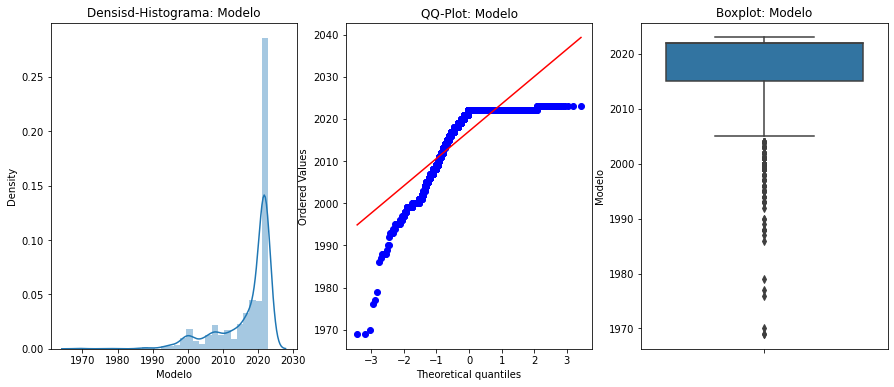

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


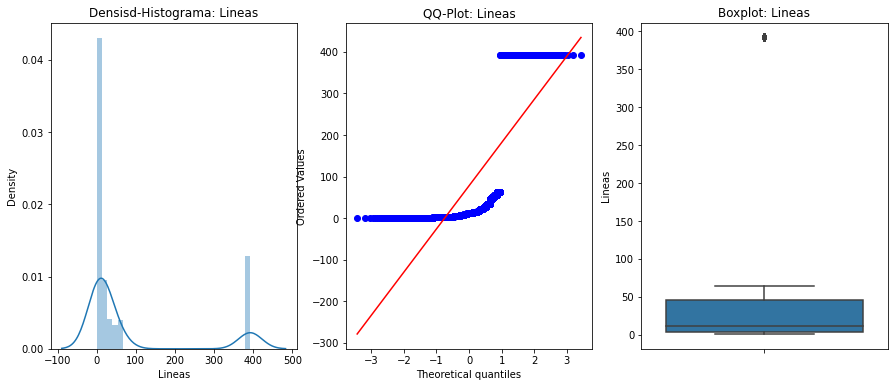

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


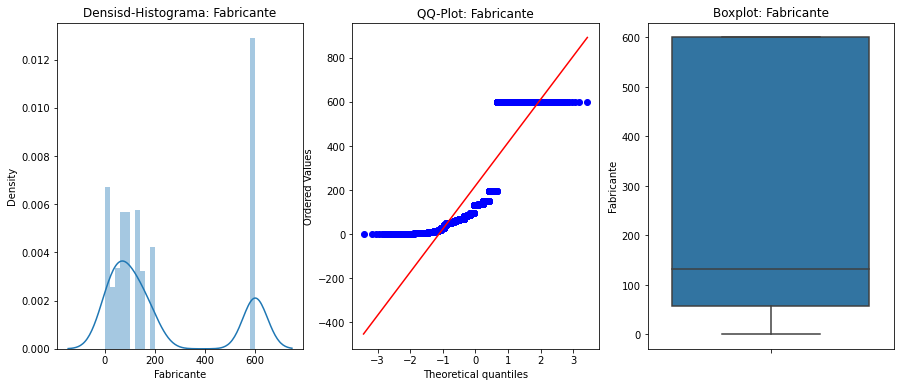

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


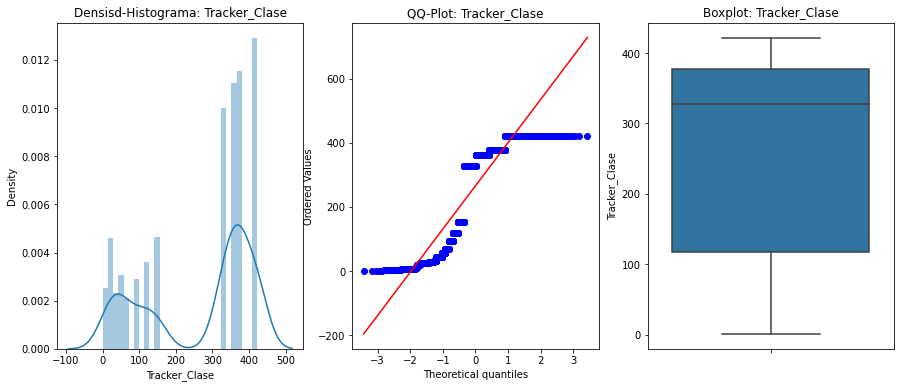

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


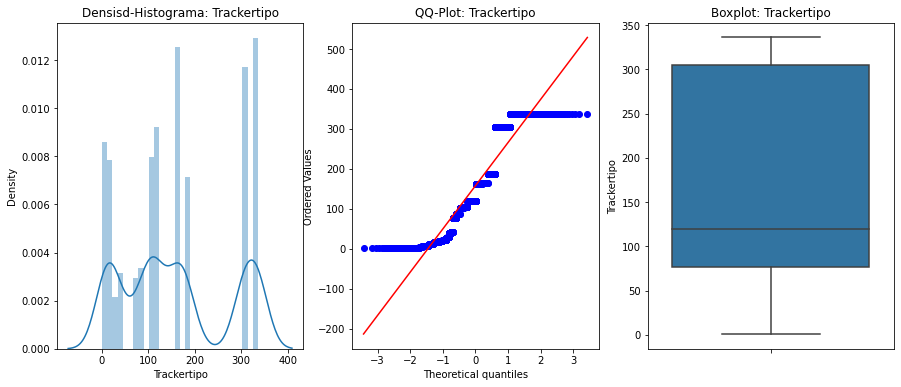

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


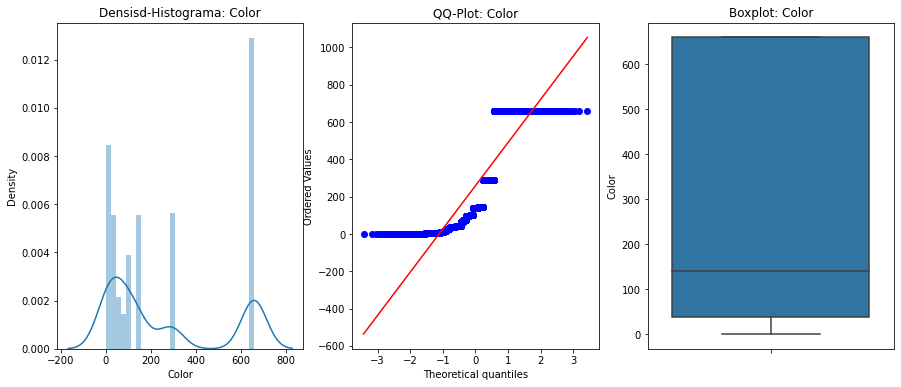

In [27]:
for col in numeric_cont_vars:
    mod.inspect_outliers(dataset_tvn, col)

In [28]:
for col in numeric_cont_vars:
    mod.detect_outliers(dataset_tvn, col, 1.75)

In [29]:
for col in numeric_cont_vars:
    pp.outlier_treatment(dataset_tvn, col, 1.75)

In [30]:
dataset_sca = dataset_tvn

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


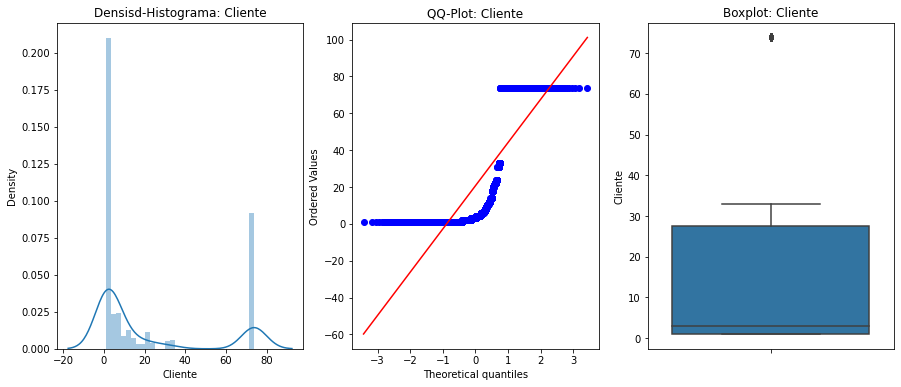

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


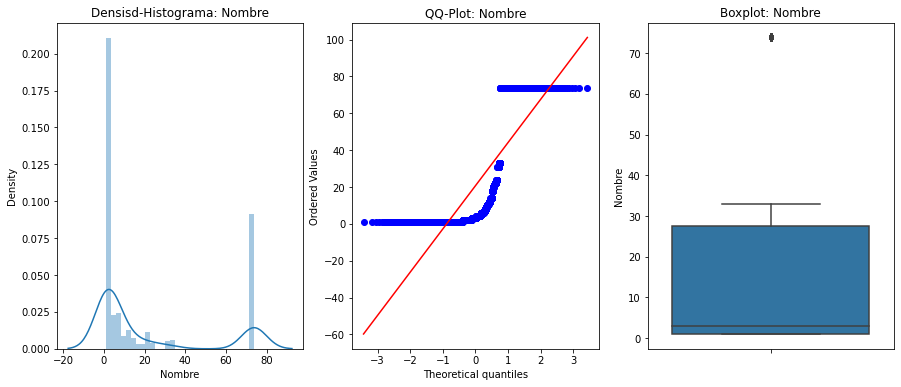

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


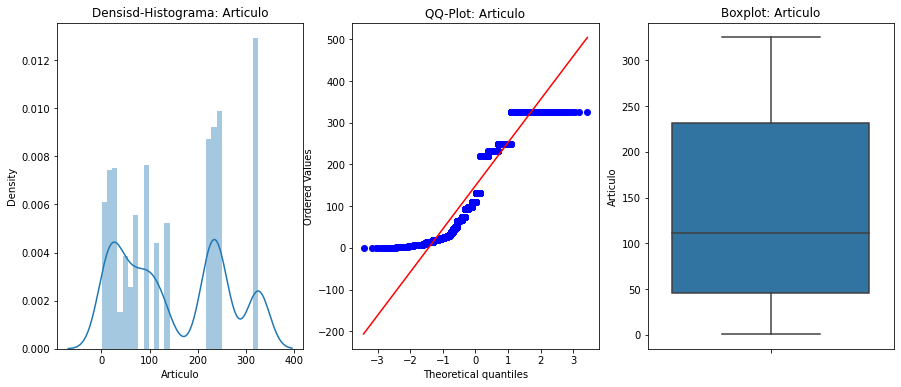

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


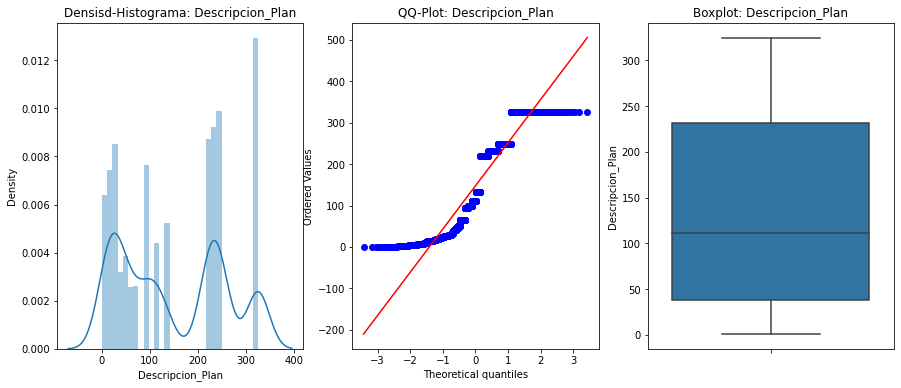

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


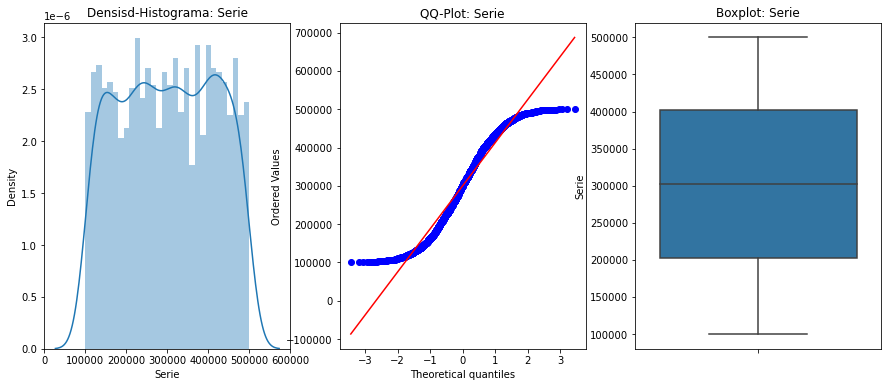

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


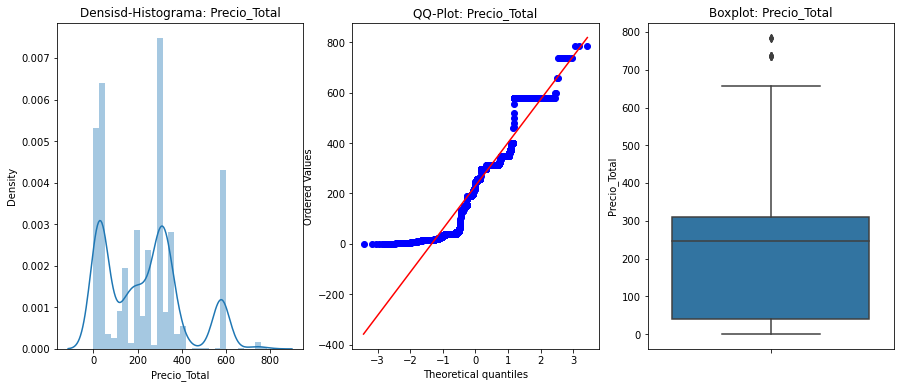

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


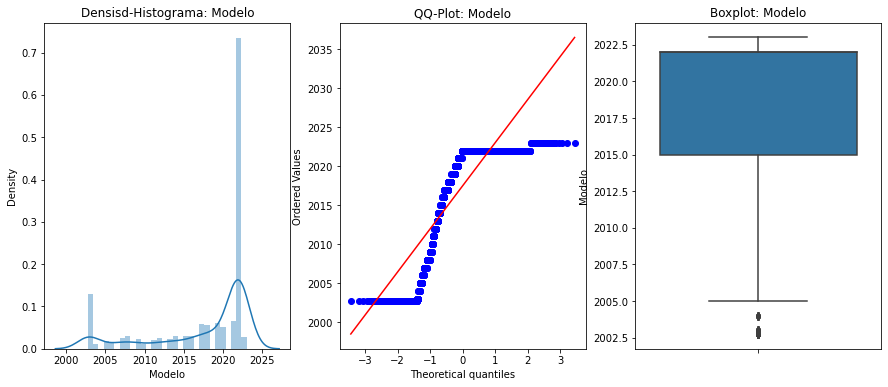

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


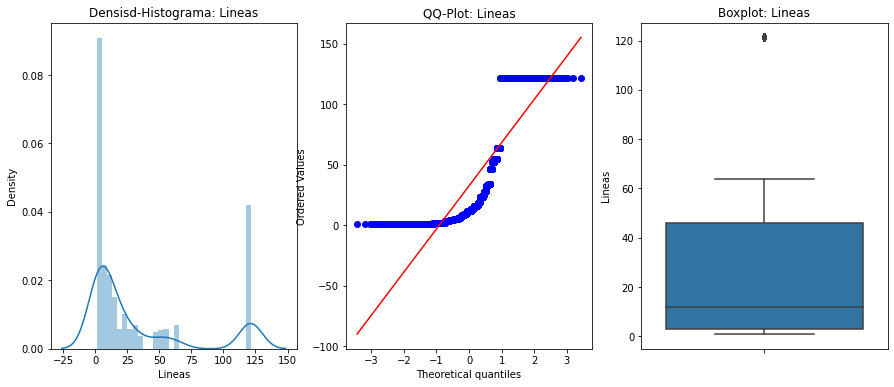

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


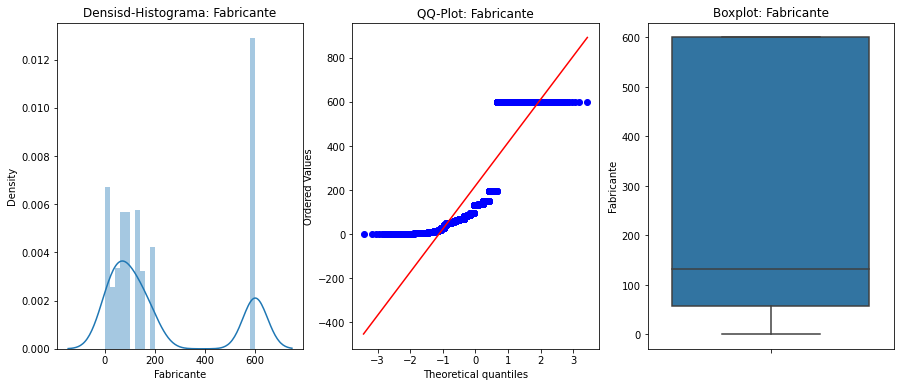

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


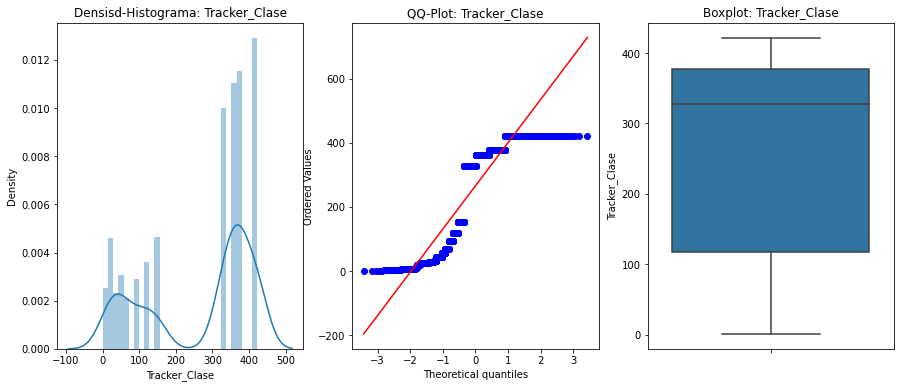

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


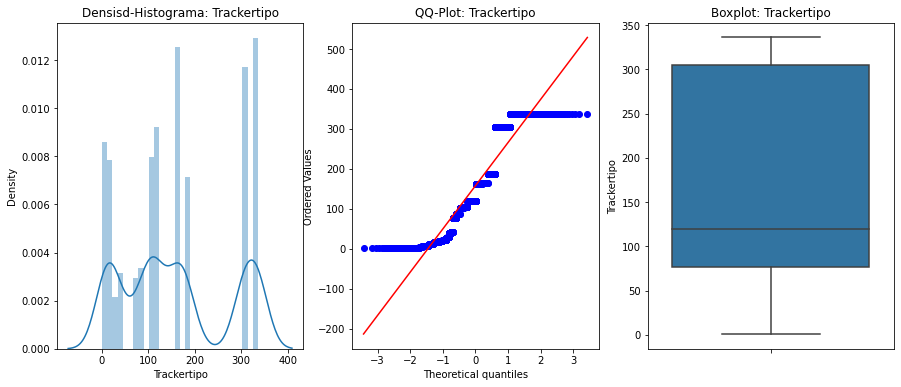

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


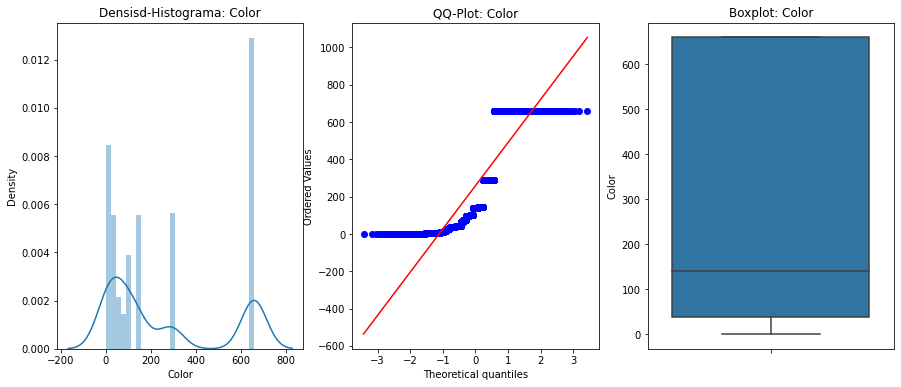

In [31]:
for col in numeric_cont_vars:
    mod.inspect_outliers(dataset_sca, col)

### Featuring Scaling

In [32]:
dataset_sca[dataset_sca.columns[1:34]]

,Cliente,Nombre,Proyecto,Grupo,Articulo,Descripcion_Plan,Equipo,Serie,Precio_Total,Placas,Modelo,Chasis,Motor,Lineas,Fabricante,Tracker_Clase,Trackertipo,Color
0,2.000,2.000,1956.0,923.0,249.0,249.0,868.0,102521.0,350.00,2.0,2002.75,2.0,2.0,2.00,68.0,118.0,120.0,4.0
1,2.000,2.000,1956.0,923.0,232.0,232.0,865.0,375768.0,220.00,2.0,2002.75,2.0,2.0,2.00,57.0,118.0,120.0,2.0
2,73.875,73.875,1956.0,53.0,232.0,232.0,865.0,456557.0,40.00,1.0,2008.00,1.0,1.0,28.00,600.0,377.0,162.0,11.0
3,73.875,73.875,1956.0,923.0,232.0,232.0,865.0,403831.0,40.00,1.0,2008.00,1.0,1.0,1.00,61.0,327.0,305.0,3.0
4,14.000,14.000,372.0,616.0,249.0,249.0,868.0,200896.0,256.48,1.0,2022.00,1.0,1.0,121.25,600.0,361.0,186.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,73.875,73.875,1956.0,341.0,325.0,325.0,398.0,497650.0,311.00,2.0,2022.00,2.0,2.0,121.25,135.0,377.0,336.0,44.0
2330,73.875,73.875,1956.0,341.0,325.0,325.0,398.0,193224.0,311.00,1.0,2022.00,1.0,1.0,121.25,135.0,377.0,336.0,141.0
2331,73.875,73.875,1956.0,341.0,325.0,325.0,398.0,176339.0,311.00,3.0,2022.00,3.0,3.0,121.25,135.0,361.0,336.0,44.0
2332,73.875,73.875,1956.0,341.0,325.0,325.0,398.0,186458.0,311.00,2.0,2022.00,2.0,2.0,55.00,135.0,377.0,77.0,5.0


In [33]:
scaler = StandardScaler()
scaler.fit(dataset_sca) 

StandardScaler()

In [34]:
dataset_final = pd.DataFrame(scaler.transform(dataset_sca), columns=dataset_sca.columns)

In [35]:
np.round(dataset_final.describe(), 2)

,Tipo_Contrato,Cliente,Nombre,Proyecto,Grupo,Articulo,Descripcion_Plan,Equipo,Serie,Precio_Total,Placas,Modelo,Chasis,Motor,Lineas,Fabricante,Tracker_Clase,Trackertipo,Color
count,2331.00,2331.00,2331.00,2331.00,2331.00,2331.00,2331.00,2331.00,2331.00,2331.00,2331.00,2331.00,2331.00,2331.00,2331.00,2331.00,2331.00,2331.00,2331.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.13,-0.67,-0.67,-2.91,-1.97,-1.35,-1.33,-2.90,-1.74,-1.28,-0.45,-2.27,-0.17,-0.17,-0.74,-0.95,-1.77,-1.37,-0.97
25%,-1.13,-0.67,-0.67,0.44,-0.89,-0.94,-0.99,-1.31,-0.85,-1.06,-0.45,-0.39,-0.17,-0.17,-0.69,-0.71,-0.99,-0.71,-0.83
50%,0.89,-0.60,-0.60,0.44,0.03,-0.35,-0.33,0.56,0.01,0.09,-0.45,0.69,-0.17,-0.17,-0.48,-0.38,0.41,-0.33,-0.44
75%,0.89,0.23,0.23,0.44,1.05,0.76,0.76,0.57,0.88,0.45,-0.45,0.69,-0.17,-0.17,0.31,1.65,0.74,1.29,1.51
max,0.89,1.82,1.82,0.44,1.05,1.61,1.60,0.57,1.73,3.08,4.31,0.85,8.69,8.69,2.07,1.65,1.04,1.56,1.51


### Data Set Final

In [52]:
dataset_final['Tipo_Contrato'] = dataset_tvn['Tipo_Contrato'].values

In [55]:
dataset_final.loc[dataset_final.Tipo_Contrato == 1025, "Tipo_Contrato"] = 1
dataset_final.loc[dataset_final.Tipo_Contrato == 1306, "Tipo_Contrato"] = 0

In [56]:
dataset_final

,Tipo_Contrato,Cliente,Nombre,Proyecto,Grupo,Articulo,Descripcion_Plan,Equipo,Serie,Precio_Total,Placas,Modelo,Chasis,Motor,Lineas,Fabricante,Tracker_Clase,Trackertipo,Color
0,1.0,-0.638445,-0.638117,0.437744,1.046054,0.911839,0.914190,0.574789,-1.717887,0.664697,1.932094,-2.270889,0.134303,0.134548,-0.713743,-0.660541,-0.989562,-0.329472,-0.961302
1,1.0,-0.638445,-0.638117,0.437744,1.046054,0.756648,0.760624,0.562767,0.655072,-0.057810,1.932094,-2.270889,0.134303,0.134548,-0.713743,-0.708417,-0.989562,-0.329472,-0.968855
2,1.0,1.818773,1.818742,0.437744,-1.840944,0.756648,0.760624,0.562767,1.356667,-1.058205,-0.449562,-1.462718,-0.171121,-0.170838,-0.105986,1.654940,0.739190,0.037578,-0.934865
3,1.0,1.818773,1.818742,0.437744,1.046054,0.756648,0.760624,0.562767,0.898779,-1.058205,-0.449562,-1.462718,-0.171121,-0.170838,-0.737119,-0.691008,0.405454,1.287294,-0.965079
4,1.0,-0.228196,-0.227928,-2.278211,0.027309,0.911839,0.914190,0.574789,-0.863569,0.144937,-0.449562,0.692404,-0.171121,-0.170838,2.073759,1.654940,0.632395,0.247320,-0.912205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,0.0,1.818773,1.818742,0.437744,-0.885248,1.605634,1.600723,-1.308682,1.713531,0.447945,1.932094,0.692404,0.134303,0.134548,2.073759,-0.368930,0.739190,1.558212,-0.810235
2327,0.0,1.818773,1.818742,0.437744,-0.885248,1.605634,1.600723,-1.308682,-0.930195,0.447945,-0.449562,0.692404,-0.171121,-0.170838,2.073759,-0.368930,0.739190,1.558212,-0.443898
2328,0.0,1.818773,1.818742,0.437744,-0.885248,1.605634,1.600723,-1.308682,-1.076830,0.447945,4.313750,0.692404,0.439726,0.439934,2.073759,-0.368930,0.632395,1.558212,-0.810235
2329,0.0,1.818773,1.818742,0.437744,-0.885248,1.605634,1.600723,-1.308682,-0.988953,0.447945,1.932094,0.692404,0.134303,0.134548,0.525147,-0.368930,0.739190,-0.705261,-0.957525


### Conversión del dataframe a csv

In [57]:
dataset_final.to_csv("DataTratada.csv", encoding = 'latin-1')

In [58]:
total_nan_values = dataset_final.isnull().sum().sum()
print (total_nan_values)

0


In [59]:
dataset_final.corr().to_csv("correlaciones.csv", encoding = 'latin-1')